In [1]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr
import pandas as pd
import matplotlib as mp
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/content/data'

In [ ]:
os.listdir('/content/data')

['happy', '.ipynb_checkpoints', 'sad']

In [ ]:
rmdir /content/data/.ipynb_checkpoints

In [ ]:
os.listdir('/content/data')

['happy', 'sad']

In [ ]:
 #CLEANING DATA
 #filtering all the extensions not in this list
 #cv2.imread reads and processes image data
 #imghdr.what finds what extension the image has and removes the unnecessary ones
 #exception removes images which gives errors

image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#loading data, and building our data pipeline
#resizes images into 256*256 and keeps them in either grayscale or RGB
#putting comma next to your durectory and entering batch_size = 16 (lets say) will change it from 32 to 16
#simiarly comma and then image_size = (128,128) (lets say) will change it from 256*256 to 128*128
data = tf.keras.utils.image_dataset_from_directory('/content/data')


Found 1300 files belonging to 2 classes.


In [ ]:
#allows to access generator from data pipeline
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
#accessing the data pipeine
batch = data_iterator.next()

In [ ]:
batch

(array([[[[ 32.       ,  27.       ,  34.       ],
          [ 32.       ,  27.       ,  34.       ],
          [ 32.185547 ,  27.185547 ,  34.185547 ],
          ...,
          [ 16.814453 ,  16.814453 ,  28.814453 ],
          [ 17.       ,  17.       ,  29.       ],
          [ 17.       ,  17.       ,  29.       ]],
 
         [[ 32.       ,  27.       ,  34.       ],
          [ 32.       ,  27.       ,  34.       ],
          [ 32.185547 ,  27.185547 ,  34.185547 ],
          ...,
          [ 19.103516 ,  19.103516 ,  31.103516 ],
          [ 19.289062 ,  19.289062 ,  31.289062 ],
          [ 19.289062 ,  19.289062 ,  31.289062 ]],
 
         [[ 32.       ,  27.       ,  34.       ],
          [ 32.       ,  27.       ,  34.       ],
          [ 32.185547 ,  27.185547 ,  34.185547 ],
          ...,
          [ 21.622509 ,  21.622509 ,  33.62251  ],
          [ 21.861328 ,  21.861328 ,  33.86133  ],
          [ 21.861328 ,  21.861328 ,  33.86133  ]],
 
         ...,
 
         [[ 

In [ ]:
#length is found to be 2 coz one part handles the image arrays and second part handles the labels ie binary classification of 0 or 1
len(batch)

2

In [ ]:
#image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

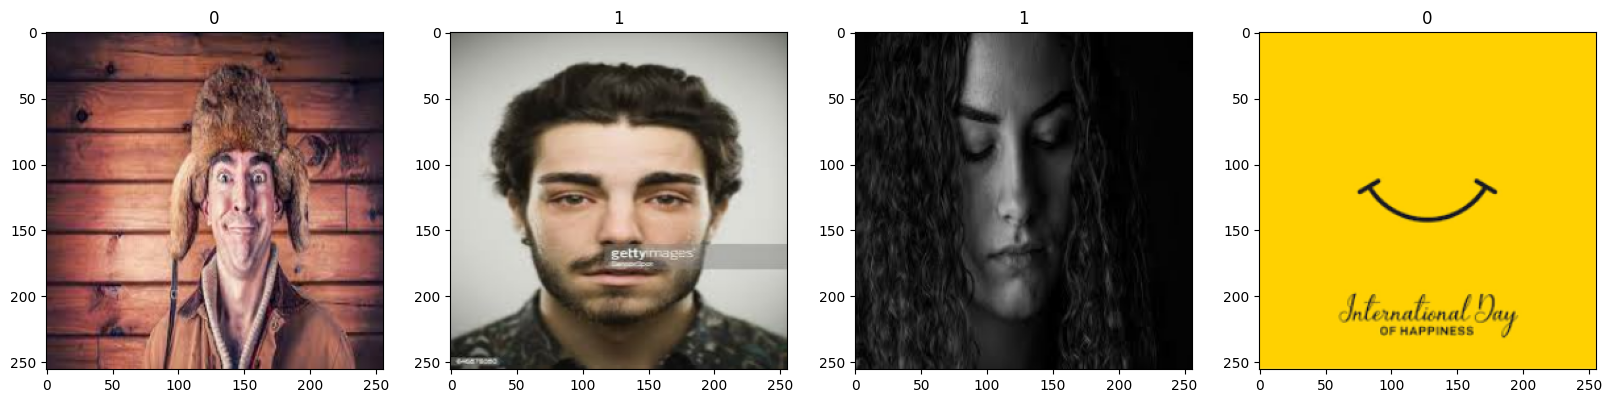

In [ ]:
#subplot produces a grid for displaying multiple images
#grid has 4 columns and the figure size is fixed to 20 by 20 inches
#iterate first 4 images of the batch using enumerate function
#or each image, we select the corresponding subplot (ax[idx]) and display the image on it using the imshow function.
#Since the imshow function expects integer values for the image data, we convert the image to an array of integers using the astype(int) method.
#Additionally set title to be the label of that image itself
#LABEL 0 = Happy People
#LABEL 1 = Sad People
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y : (x/255,y))

In [ ]:
#scaling the data
scaled_batch = data.as_numpy_iterator().next()

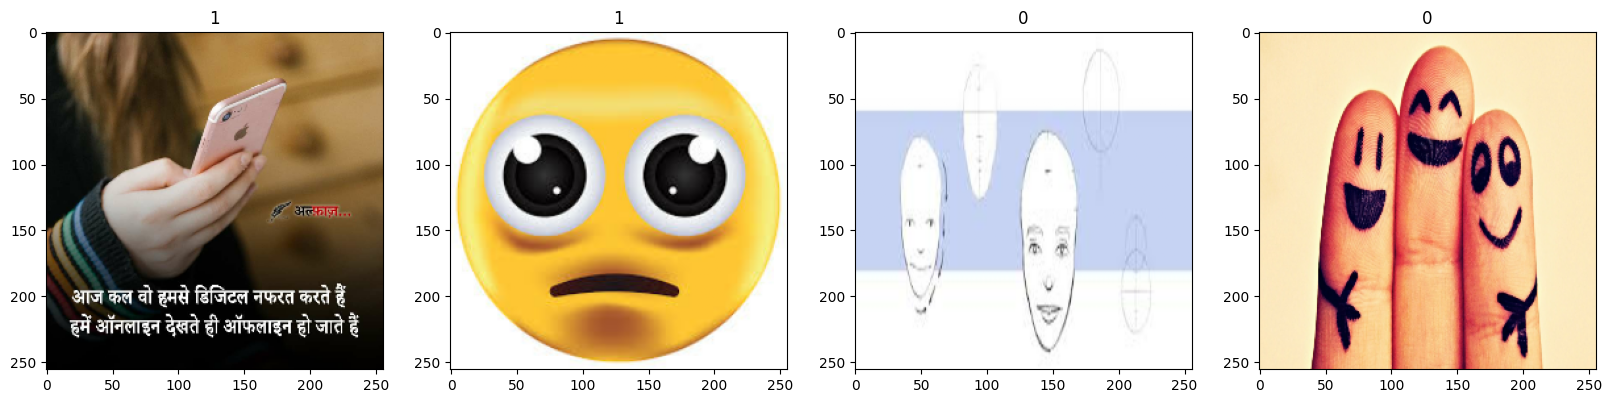

In [ ]:
#ax[idx].imshow(img.astype(int)) not used as if you integerise it it will bring it down to zero
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])

In [ ]:
len(data)

41

In [ ]:
#splitting the data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2 + 1)
test_size = int(len(data)*.1)
print(train_size,val_size,test_size)

28 9 4


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
#Building the deep neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Lambda

In [ ]:
model = Sequential()

In [ ]:
#number of filters, size of filter, stride
#relu takes all negetive values to zero and and conserves positive values
#sigmoid gives values between zero and one
#maxpooling has 2*2 filter with a stride of 2, so divides your size of layer by two
#Flatten flattens out all the values into a 1D format
#dense is a layer with 256 neurons, and then 1 neuron for final output
model.add(Conv2D(16, (3,3), 1,activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))




In [ ]:
#In this code snippet, we are compiling a machine learning model using the Keras library with the TensorFlow backend.
#'adam' refers to the Adam optimizer, which is a popular optimization algorithm used for training neural networks.
#The optimizer is responsible for updating the weights of the model during training to minimize the loss function.
#loss=tf.losses.BinaryCrossentropy() specifies the loss function to be used during training.
#In this case, we are using the Binary Crossentropy loss, which is commonly used for binary classification problems
#Accuracy which calculates the percentage of correctly predicted labels.
#By calling model.compile with these arguments, we are configuring the model to use the Adam optimizer, the Binary Crossentropy loss function, and track the accuracy metric during training.
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
#Training the data
logdir='logs'

In [ ]:
#The TensorBoard callback is used for logging and visualization during the training process of a TensorFlow model.
#In the code, log_dir is the directory where the log files for TensorBoard will be written.
#The log files contain information about metrics, losses, gradients, and other relevant data that can be visualized in TensorBoard.
#By using this callback and specifying the log_dir, you can monitor and visualize various aspects of your model's training, including training and validation metrics, learning curves, histograms of weights and biases, and more. This can be helpful in analyzing and improving the model's performance.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
28/28 [==============================] - 19s 284ms/step - loss: 0.6726 - accuracy: 0.5859 - val_loss: 0.6922 - val_accuracy: 0.5694
Epoch 2/30
28/28 [==============================] - 8s 289ms/step - loss: 0.6083 - accuracy: 0.6652 - val_loss: 0.5986 - val_accuracy: 0.6875
Epoch 3/30
28/28 [==============================] - 11s 360ms/step - loss: 0.5781 - accuracy: 0.6931 - val_loss: 0.6112 - val_accuracy: 0.6562
Epoch 4/30
28/28 [==============================] - 9s 322ms/step - loss: 0.5065 - accuracy: 0.7467 - val_loss: 0.6134 - val_accuracy: 0.6944
Epoch 5/30
28/28 [==============================] - 7s 252ms/step - loss: 0.4408 - accuracy: 0.7857 - val_loss: 0.6675 - val_accuracy: 0.6875
Epoch 6/30
28/28 [==============================] - 8s 287ms/step - loss: 0.4235 - accuracy: 0.8114 - val_loss: 0.5734 - val_accuracy: 0.6944
Epoch 7/30
28/28 [==============================] - 6s 202ms/step - loss: 0.3114 - accuracy: 0.8739 - val_loss: 0.5210 - val_accuracy: 0.7500
Epoc

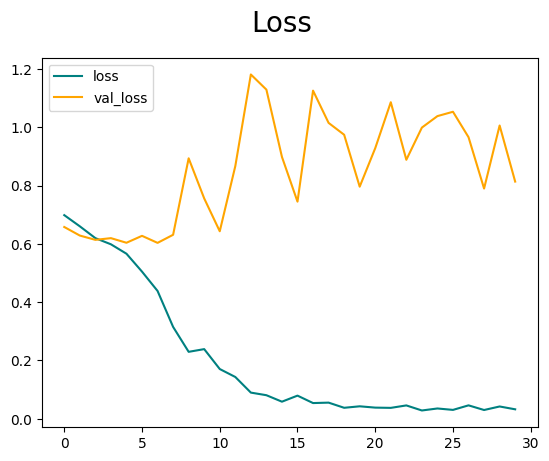

In [ ]:
#Plotting performance
#Your model is overfitting as the yellow line should go down as well, so you might want to look up regularisation techniques
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

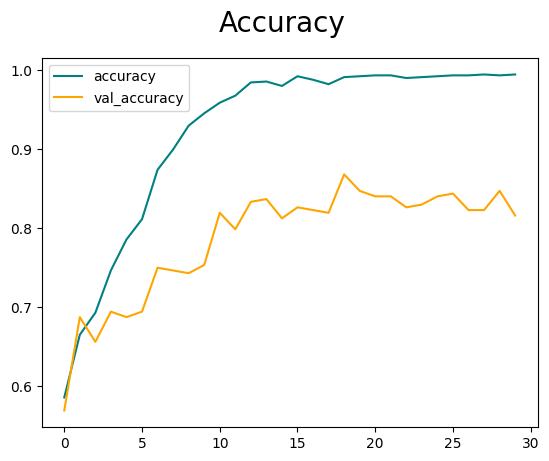

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Evaluating
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 368ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.877551, shape=(), dtype=float32) tf.Tensor(0.7288136, shape=(), dtype=float32) tf.Tensor(0.8103448, shape=(), dtype=float32)


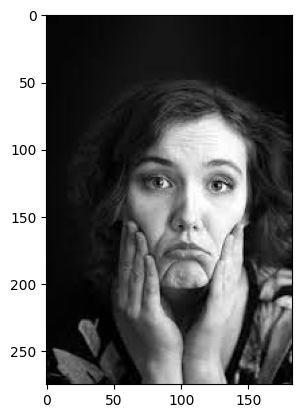

In [5]:
#Testing
import cv2
img = cv2.imread('/content/images843.jpg')
plt.imshow(img)
plt.show()

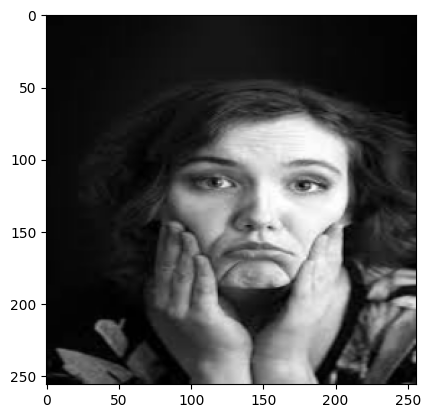

In [6]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [ ]:
yhat

array([[0.69993085]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
